# ZigZag Indicator

## Import

In [49]:
import pandas_ti
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
from typing import Literal

## Download Data

In [50]:
ticker = 'META'
df = yf.Ticker(ticker).history(period='2y', interval='1d', rounding=True)[['Open', 'High', 'Low', 'Close', 'Volume']]
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-18 00:00:00-05:00,335.41,345.43,334.96,342.51,18993900
2023-12-19 00:00:00-05:00,343.46,351.43,343.01,348.21,17729400
2023-12-20 00:00:00-05:00,346.51,352.79,345.66,347.14,16369900
2023-12-21 00:00:00-05:00,350.82,354.23,347.07,351.92,15289600
2023-12-22 00:00:00-05:00,353.40,355.01,349.07,351.22,11772800
...,...,...,...,...,...
2025-12-09 00:00:00-05:00,663.77,664.48,653.34,656.96,12997100
2025-12-10 00:00:00-05:00,649.95,654.51,643.40,650.13,16910900
2025-12-11 00:00:00-05:00,643.29,655.28,640.80,652.71,13056700


## Usage

### RealTime - ZigZagClass

In [51]:
from pandas_ti import ZigZagClass

# Create instance
zz_manual = ZigZagClass(pct=0.1)
# Process each candle
for idx, row in df.iterrows():
    zz_manual.update(high=row['High'], low=row['Low'], idx=idx)

### Wrapper - ZigZag

In [52]:
# Option 1: DataFrame accessor
zz = df.ti.ZigZag(pct=0.1)

# Option 2: Direct import
from pandas_ti import ZigZag
zz = ZigZag(High=df['High'], Low=df['Low'], pct=0.1)

## Outputs

### .series()

In [53]:
# .series() - Returns Series with pivot prices
pivots = zz.series(include_candidate=False)
pivots.dropna()

2023-12-18 00:00:00-05:00    334.96
2024-04-08 00:00:00-04:00    528.79
2024-04-25 00:00:00-04:00    412.40
2024-07-08 00:00:00-04:00    540.59
2024-07-25 00:00:00-04:00    440.84
2024-08-01 00:00:00-04:00    525.02
2024-08-05 00:00:00-04:00    448.96
2025-02-14 00:00:00-05:00    739.18
2025-03-18 00:00:00-04:00    573.83
2025-03-25 00:00:00-04:00    632.97
2025-04-07 00:00:00-04:00    481.20
2025-04-09 00:00:00-04:00    587.04
2025-04-21 00:00:00-04:00    479.11
2025-08-15 00:00:00-04:00    795.71
2025-11-19 00:00:00-05:00    581.25
2025-12-12 00:00:00-05:00    711.00
dtype: float64

### .dataframe()

In [54]:
# .dataframe() - Returns DataFrame with metadata
df_pivots = zz.dataframe(include_candidate=True)
df_pivots.dropna()

,pivot,extreme,type
index,,,
2023-12-18 00:00:00-05:00,334.96,Low,confirmed
2024-04-08 00:00:00-04:00,528.79,High,confirmed
2024-04-25 00:00:00-04:00,412.40,Low,confirmed
2024-07-08 00:00:00-04:00,540.59,High,confirmed
2024-07-25 00:00:00-04:00,440.84,Low,confirmed
2024-08-01 00:00:00-04:00,525.02,High,confirmed
2024-08-05 00:00:00-04:00,448.96,Low,confirmed
2025-02-14 00:00:00-05:00,739.18,High,confirmed
2025-03-18 00:00:00-04:00,573.83,Low,confirmed


### Attributes

In [55]:
# Direct attributes
print(f'Candidate: {zz.candidate_price}')
print(f'Last confirmed: {zz.last_confirmed_price}')
print(f'Type: {zz.last_confirmed_type}')

Candidate: -inf
Last confirmed: 711.0
Type: High


## Visualization

### Basic Chart

In [ ]:
# Configure custom chart style
my_style = mpf.make_mpf_style(
    base_mpf_style='classic',
    facecolor='white',
    gridcolor='lightgray',
    gridstyle='-',
    y_on_right=False,
    rc={
        'axes.edgecolor': 'black',
        'axes.spines.top': False,
        'axes.spines.right': False
    }
)

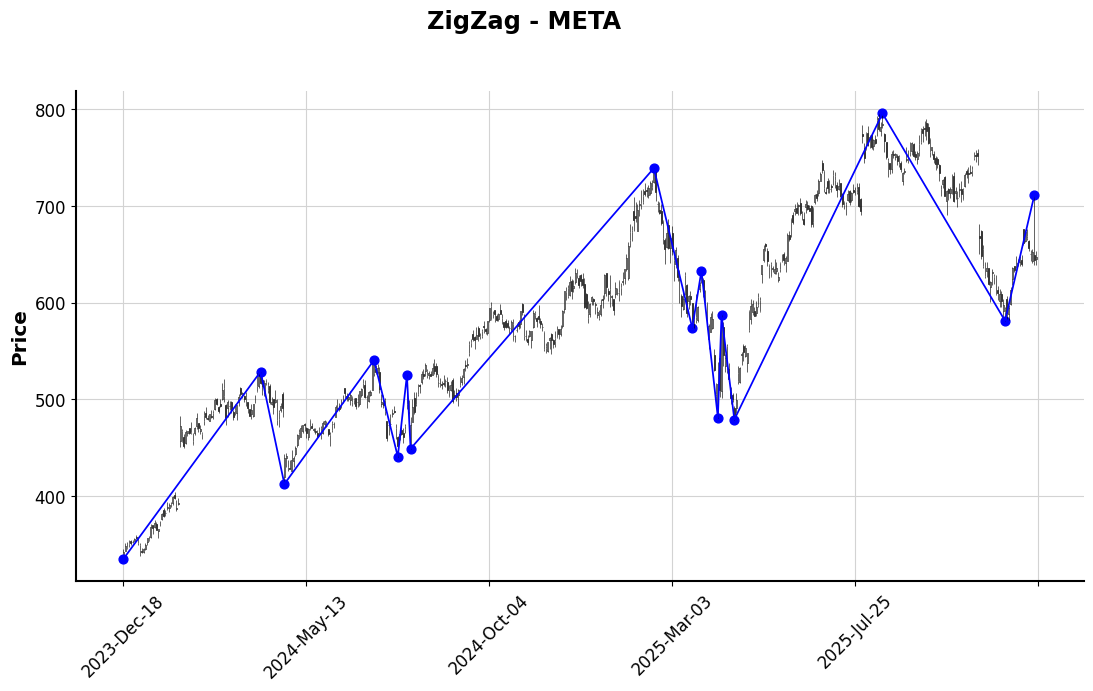

In [57]:
# Prepare data
df['zigzag'] = zz.series(include_candidate=True)
df['zigzag_line'] = df['zigzag'].interpolate(method='linear', limit_area='inside')

# Plot
apds = [
    mpf.make_addplot(df['zigzag'], type='scatter', color='blue', marker='o', markersize=40),
    mpf.make_addplot(df['zigzag_line'], type='line', color='blue')
]

mpf.plot(df, style=my_style, type='candle', addplot=apds, title=f"ZigZag - {ticker}", figsize=(14, 7), volume=False)

### With Smoothing

In [58]:
df2 = yf.Ticker(ticker).history(period='2y', interval='1d')[['Open', 'High', 'Low', 'Close', 'Volume']]

# Apply SMA smoothing
df2['High_SMA'] = df2['High'].ti.SMA(n=3)
df2['Low_SMA'] = df2['Low'].ti.SMA(n=3)

# ZigZag on smoothed data
zz2 = ZigZag(High=df2['High_SMA'], Low=df2['Low_SMA'], pct=0.1)
df2['zigzag'] = zz2.series(include_candidate=True)

df2['zigzag'].dropna()

Date
2024-01-04 00:00:00-05:00    340.100034
2024-04-08 00:00:00-04:00    528.037900
2024-04-29 00:00:00-04:00    422.850859
2024-07-09 00:00:00-04:00    538.179390
2024-07-26 00:00:00-04:00    452.361369
2025-02-18 00:00:00-05:00    733.922315
2025-04-08 00:00:00-04:00    492.275368
2025-04-10 00:00:00-04:00    571.381097
2025-04-22 00:00:00-04:00    487.352488
2025-08-15 00:00:00-04:00    792.638377
2025-11-21 00:00:00-05:00    582.153320
2025-12-08 00:00:00-05:00    675.833333
Name: zigzag, dtype: float64

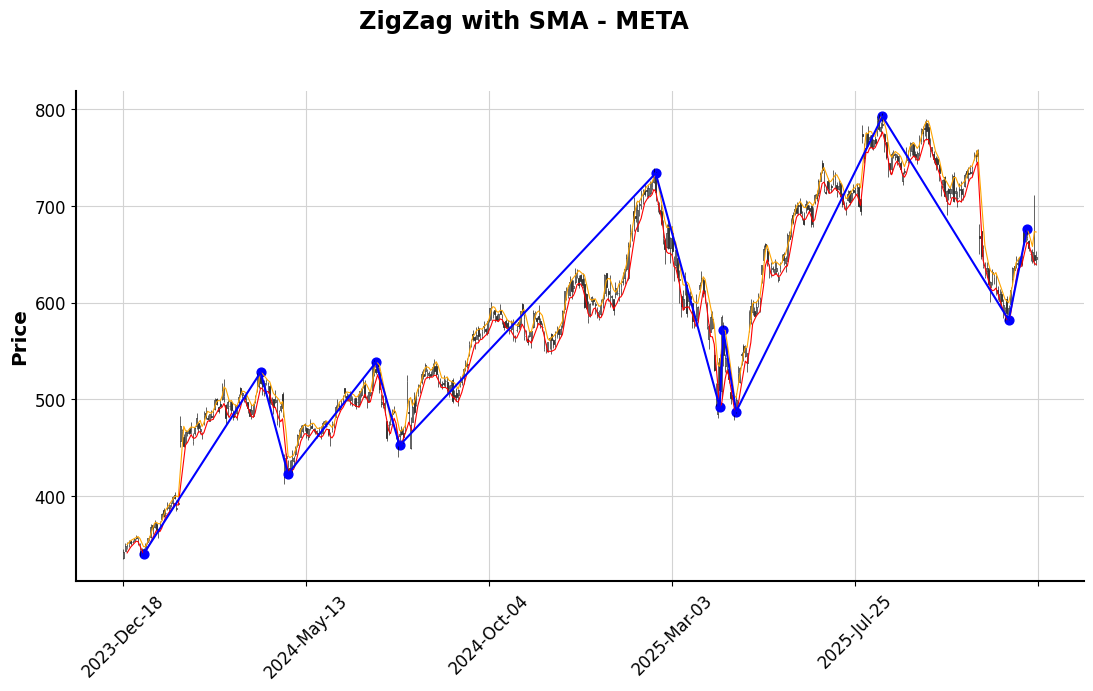

In [59]:
# Plot with smoothing
df2['zigzag_line'] = df2['zigzag'].interpolate(method='linear', limit_area='inside')

apds = [
    mpf.make_addplot(df2['High_SMA'], type='line', color='orange', width=0.8),
    mpf.make_addplot(df2['Low_SMA'], type='line', color='red', width=0.8),
    mpf.make_addplot(df2['zigzag'], type='scatter', color='blue', marker='o', markersize=40),
    mpf.make_addplot(df2['zigzag_line'], type='line', color='blue', width=1.5)
]

mpf.plot(df2, style=my_style, type='candle', addplot=apds, title=f"ZigZag with SMA - {ticker}", figsize=(14, 7), volume=False)